In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import geopandas as gpd
import math

rff = xr.open_dataset('RFF_H_GRD.nc')
drainage = xr.open_dataset('../MESH_drainage_database.nc')
forcing = xr.open_dataset('../MESH_forcing.nc')
catchment = gpd.read_file('../shapefiles/div_4815_catchments.shp')

In [2]:
order = forcing['subbasin'].to_numpy()
catchment.set_index('COMID', inplace=True)
catchment = catchment.reindex(order)
catchment['plot_var'] = rff['RFF'].isel(time=0,lat=0)
catchment = catchment.reset_index()

In [17]:
catchment[catchment["COMID"]==71037856].index.values # this is the correct mapping
catchment.iloc[648] # this is the wrong mapping

COMID                                                 71037879
unitarea                                             32.041303
hillslope                                                    0
geometry     POLYGON ((-114.55958333333334 50.5337500000000...
plot_var                                             11.319161
Name: 648, dtype: object

/home/roalva/virtual-envs/test_env/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


Text(0.5, 1.0, 'Streamflow data')

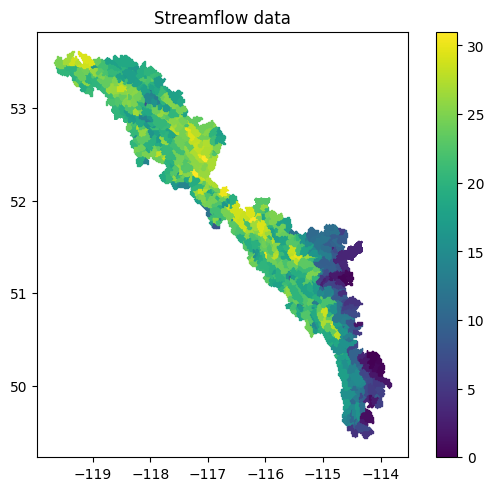

In [3]:
var = rff['RFF'].isel(time=0,lat=0)

vmin = math.floor(min(var.min().values,var.min()))
vmax = math.floor(min(var.max().values,var.max()))

fig, ax = plt.subplots(layout='constrained')
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbr = fig.colorbar(sm, ax=ax)

catchment.plot(ax=ax,column='plot_var', vmin=vmin,vmax=vmax, edgecolor="face");
plt.title('Streamflow data')


In [18]:
# compute metric
import pandas as pd
def nse(simulated, observed):
    denominator = np.sum((observed - np.mean(observed)) ** 2)
    numerator = np.sum((simulated - observed) ** 2)
    nse = 1 - numerator / denominator
    return nse


sim_df = pd.read_csv('./RFF_D.csv', header=None)
obs_df = pd.read_csv('./05BL027_Daily_Flow_ts.csv', skiprows=1, header=None, names=['ID','PARAM','Date','Flow','SYM'])
obs_df['Date'] = pd.to_datetime(obs_df['Date'])

In [19]:
start_date = '1980-05-02'
end_date = '1980-05-29'
mask = (obs_df['Date'] >= start_date) & (obs_df['Date'] <= end_date)
obs = obs_df.loc[mask]['Flow'].to_numpy()


In [20]:
sim_df = pd.read_csv('./RFF_D.csv', header=None)
sim = sim_df[649].to_numpy()

In [21]:
import numpy as np
print(len(sim),len(obs))
metric = 1.0*nse(sim,obs)
metric

28 28


-84.42411776694034

In [31]:
import csv

with open('./MetricTest.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([metric])
    


In [39]:
import sqlite3
con = sqlite3.connect("Hydat.sqlite3")
cur = con.cursor()
res = cur.execute("SELECT STATION_NUMBER,FLOW1,YEAR FROM DLY_FLOWS")
res.fetchone()


('01AD001', 16.600000381469727, 1928)

In [40]:
len(temp)

3